 # I divided the assignment in two parts


## Part 1: Build basic pipeline explored dataset and performed k-means clustering.
## Part 2: Data analysis using 3 different statistical or machine learning algorithms  and build user interface.



# Part 1
*Data loading, Data cleaning and preprocessing, feature extraction, k-means.*

In [9]:
import seaborn as sns


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("olympics2024.csv")

In [12]:
# Data cleaning and preprocessing
numeric_cols = ['Gold', 'Silver', 'Bronze', 'Total']
categorical_cols = ['Country', 'Country Code']


In [13]:
# Fill missing values in numeric columns with 0 (assuming no medals means 0)
df[numeric_cols] = df[numeric_cols].fillna(0)

In [14]:
# Create a new feature for total medals if not already present
if 'Total' not in df.columns:
    df['Total'] = df['Gold'] + df['Silver'] + df['Bronze']

In [15]:
# Normalize the medal counts
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)



In [16]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


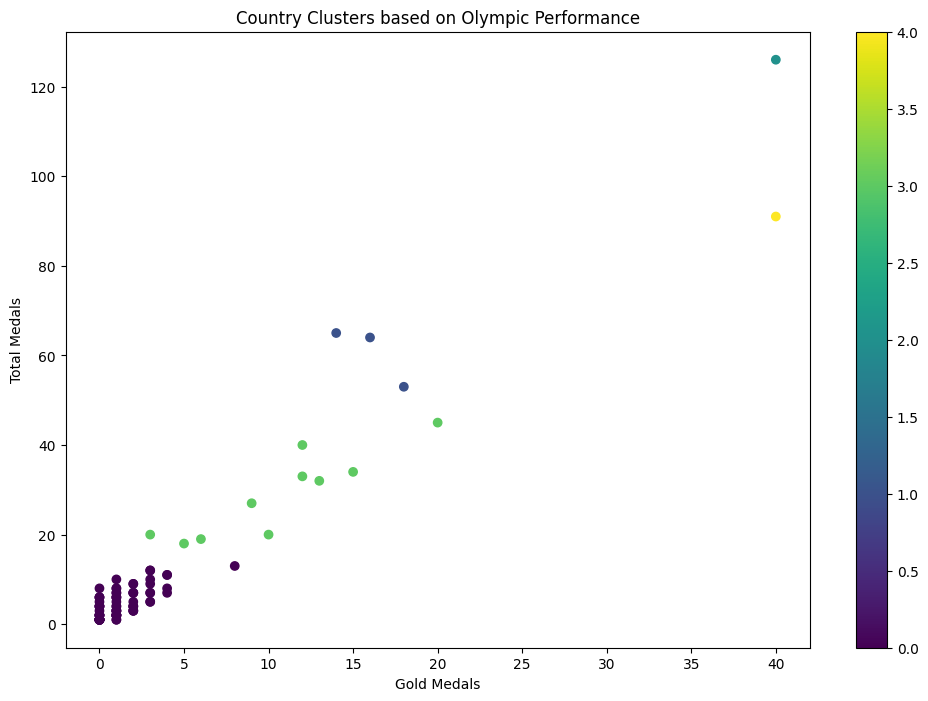

In [17]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Gold'], df['Total'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Gold Medals')
plt.ylabel('Total Medals')
plt.title('Country Clusters based on Olympic Performance')
plt.colorbar(scatter)
plt.show()

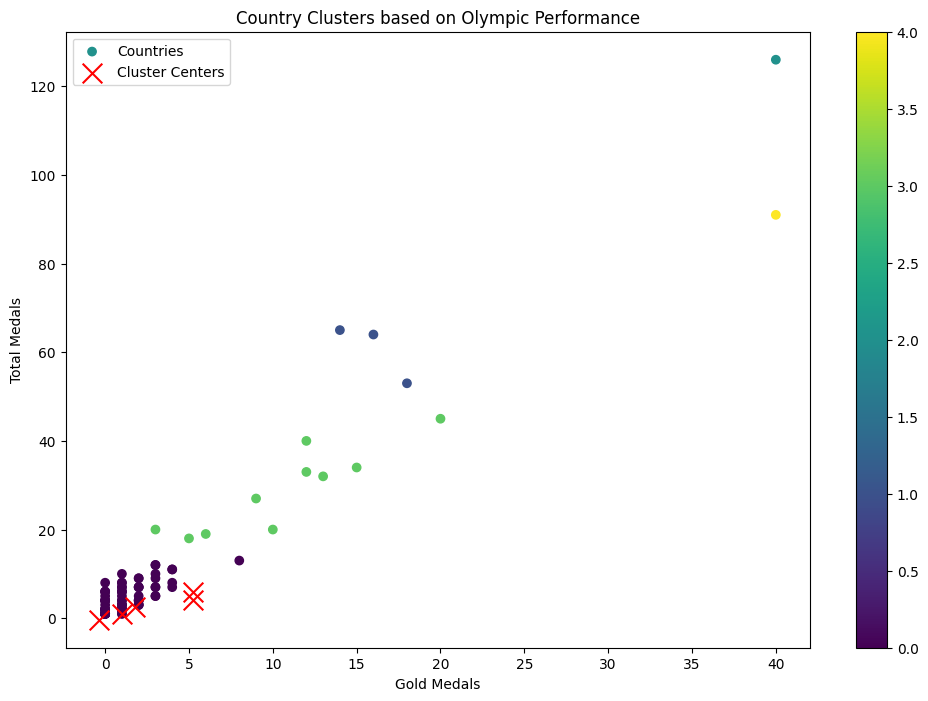

In [18]:
# Visualize the clusters with cluster centers
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Gold'], df['Total'], c=df['Cluster'], cmap='viridis', label='Countries')
plt.scatter(centers[:, 0], centers[:, 3], c='red', s=200, marker='x', label='Cluster Centers')  # Adjust indexing as needed
plt.xlabel('Gold Medals')
plt.ylabel('Total Medals')
plt.title('Country Clusters based on Olympic Performance')
plt.colorbar(scatter)
plt.legend()
plt.show()

In [19]:
# Generate a summary report
print("Olympic Medal Analysis Report")
print("=============================")
print(f"\nTotal participating countries: {len(df)}")
print(f"\nTop 5 countries by total medals:")
print(df.nlargest(5, 'Total')[['Country', 'Gold', 'Silver', 'Bronze', 'Total']])

print("\nMedal distribution by cluster:")
print(df.groupby('Cluster')[numeric_cols].mean())

print("\nCountries in each cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Country'].tolist())

Olympic Medal Analysis Report

Total participating countries: 91

Top 5 countries by total medals:
         Country  Gold  Silver  Bronze  Total
0  United States    40      44      42    126
1          China    40      27      24     91
6  Great Britain    14      22      29     65
4         France    16      26      22     64
3      Australia    18      19      16     53

Medal distribution by cluster:
          Gold     Silver     Bronze       Total
Cluster                                         
0         1.25   1.355263   2.026316    4.631579
1        16.00  22.333333  22.333333   60.666667
2        40.00  44.000000  42.000000  126.000000
3        10.50   8.600000   9.700000   28.800000
4        40.00  27.000000  24.000000   91.000000

Countries in each cluster:

Cluster 2:
['United States']

Cluster 4:
['China']

Cluster 3:
['Japan', 'Netherlands', 'South Korea', 'Italy', 'Germany', 'New Zealand', 'Canada', 'Hungary', 'Spain', 'Brazil']

Cluster 1:
['Australia', 'France', 'Great 

# Part 2

*Analysis using 3 algorithms*


*Command-line interface for users to interact with the AI employee.*

*Implement basic NLP to understand user queries*





In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import json
import openpyxl
import cmd
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class DataIngestion:
    @staticmethod
    def load_data(file_path):
        if file_path.endswith('.csv'):
            return pd.read_csv(file_path)
        elif file_path.endswith('.json'):
            with open(file_path, 'r') as f:
                return pd.DataFrame(json.load(f))
        elif file_path.endswith('.xlsx'):
            return pd.read_excel(file_path)
        else:
            raise ValueError("Unsupported file format")

class DataAnalysis:
    def __init__(self, df):
        self.df = df
        self.numeric_cols = ['Gold', 'Silver', 'Bronze', 'Total']
        self.categorical_cols = ['Country', 'Country Code']

    def preprocess_data(self):
        self.df[self.numeric_cols] = self.df[self.numeric_cols].fillna(0)
        if 'Total' not in self.df.columns:
            self.df['Total'] = self.df['Gold'] + self.df['Silver'] + self.df['Bronze']
        self.scaler = StandardScaler()
        self.df_scaled = pd.DataFrame(self.scaler.fit_transform(self.df[self.numeric_cols]), columns=self.numeric_cols)

    def kmeans_clustering(self, n_clusters=5):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.df['Cluster'] = kmeans.fit_predict(self.df_scaled)
        return self.df['Cluster']

    def linear_regression(self, target='Total', features=['Gold', 'Silver', 'Bronze']):
        X = self.df[features]
        y = self.df[target]
        model = LinearRegression()
        model.fit(X, y)
        return model, model.score(X, y)

    def random_forest(self, target='Total', features=['Gold', 'Silver', 'Bronze']):
        X = self.df[features]
        y = self.df[target]
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        return model, model.score(X, y)

class ReportGeneration:
    def __init__(self, df, analysis):
        self.df = df
        self.analysis = analysis

    def generate_summary(self):
        summary = f"Olympic Medal Analysis Report\n"
        summary += f"=============================\n"
        summary += f"\nTotal participating countries: {len(self.df)}\n"
        summary += f"\nTop 5 countries by total medals:\n"
        summary += f"{self.df.nlargest(5, 'Total')[['Country', 'Gold', 'Silver', 'Bronze', 'Total']]}\n"
        summary += f"\nMedal distribution by cluster:\n"
        summary += f"{self.df.groupby('Cluster')[self.analysis.numeric_cols].mean()}\n"
        return summary

    def generate_visualizations(self):
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(self.df['Gold'], self.df['Total'], c=self.df['Cluster'], cmap='viridis')
        plt.xlabel('Gold Medals')
        plt.ylabel('Total Medals')
        plt.title('Country Clusters based on Olympic Performance')
        plt.colorbar(scatter)
        plt.savefig('cluster_visualization.png')
        plt.close()

        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df[self.analysis.numeric_cols].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap of Medal Counts')
        plt.savefig('correlation_heatmap.png')
        plt.close()

    def generate_report(self):
        summary = self.generate_summary()
        self.generate_visualizations()
        report = f"{summary}\n\nVisualizations have been saved as 'cluster_visualization.png' and 'correlation_heatmap.png'."
        return report

class OlympicsAnalyzer(cmd.Cmd):
    intro = (
        "Welcome to the Olympics Analyzer!\n"
        "This tool allows you to analyze Olympic medal data using various machine learning algorithms.\n"
        "To get started, follow these steps:\n"
        "1. Load your data using the 'load' command.\n"
        "   Example: load olympics2024.csv\n"
        "2. Perform analysis using the 'analyze' command.\n"
        "3. Generate a report with the 'report' command.\n"
        "4. Query specific information using the 'query' command.\n"
        "Type 'help' to see all available commands.\n"
    )
    prompt = "(Olympics) "

    def __init__(self):
        super().__init__()
        self.df = None
        self.analysis = None
        self.report = None

    def do_help(self, arg):
        """Show help information for commands."""
        if arg:
            # If a specific command is requested, show its docstring
            cmd.Cmd.do_help(self, arg)
        else:
            # General help message with detailed descriptions
            help_message = """
Available Commands:
===================
load <file_path>
    Load data from a specified file. Supported formats: .csv, .json, .xlsx
    Example: load olympics2024.csv

analyze
    Perform data analysis using K-means clustering, Linear Regression, and Random Forest algorithms.
    Example: analyze

report
    Generate and display a summary report of the analysis, including visualizations.
    Example: report

query <question>
    Ask questions about the data. Supported queries:
        - Top N countries by total medals
            Example: query top 5 countries
        - Total medals for a specific country
            Example: query total medals for USA

exit
    Exit the Olympics Analyzer.
    Example: exit

help
    Show this help message or get detailed help for a specific command.
    Example: help load
"""
            print(help_message)

    def do_load(self, arg):
        """Load data from a file: load <file_path>"""
        if not arg:
            print("Please provide a file path. Example: load olympics2024.csv")
            return
        try:
            self.df = DataIngestion.load_data(arg)
            self.analysis = DataAnalysis(self.df)
            self.analysis.preprocess_data()
            print(f"Data loaded successfully. Shape: {self.df.shape}")
        except FileNotFoundError:
            print(f"File not found: {arg}. Please check the file path and try again.")
        except ValueError as ve:
            print(f"Value Error: {ve}")
        except Exception as e:
            print(f"An unexpected error occurred: {str(e)}")

    def do_analyze(self, arg):
        """Perform analysis on the loaded data"""
        if self.df is None:
            print("No data loaded. Please load data first using the 'load' command.")
            return
        try:
            self.analysis.kmeans_clustering()
            lr_model, lr_score = self.analysis.linear_regression()
            rf_model, rf_score = self.analysis.random_forest()
            print(f"K-means clustering completed.")
            print(f"Linear Regression R-squared: {lr_score:.4f}")
            print(f"Random Forest R-squared: {rf_score:.4f}")
        except Exception as e:
            print(f"An error occurred during analysis: {str(e)}")

    def do_report(self, arg):
        """Generate and display the analysis report"""
        if self.analysis is None:
            print("No analysis performed. Please perform analysis first using the 'analyze' command.")
            return
        try:
            report_gen = ReportGeneration(self.df, self.analysis)
            self.report = report_gen.generate_report()
            print(self.report)
        except Exception as e:
            print(f"An error occurred while generating the report: {str(e)}")

    def do_query(self, arg):
        """Query the data: query <question>"""
        if self.df is None:
            print("No data loaded. Please load data first using the 'load' command.")
            return

        if "top" in arg.lower() and "countries" in arg.lower():
            match = re.search(r'\btop\s+(\d+)\s+countries\b', arg.lower())
            if match:
                n = int(match.group(1))
                top_countries = self.df.nlargest(n, 'Total')[['Country', 'Total']]
                print(top_countries)
            else:
                print("Please specify the number of top countries. Example: query top 5 countries")

        elif "total medals for" in arg.lower():
            match = re.search(r'total medals for\s+(.+)', arg.lower())
            if match:
                country = match.group(1).strip().title()
                medals = self.df[self.df['Country'].str.contains(country, case=False)]['Total'].values
                if len(medals) > 0:
                    print(f"{country} won {medals[0]} medals in total.")
                else:
                    print(f"No data found for {country}.")
            else:
                print("Please specify the country. Example: query total medals for USA")
        else:
            print("I'm sorry, I couldn't understand that query. Try asking about top countries or total medals for a specific country.")

    def do_exit(self, arg):
        """Exit the program"""
        confirm = input("Are you sure you want to exit? (yes/no): ").strip().lower()
        if confirm in ['yes', 'y']:
            print("Thank you for using the Olympics Analyzer. Goodbye!")
            return True
        else:
            print("Exit cancelled.")

    def completenames(self, text, *ignored):
        return [name[3:] for name in self.get_names() if name.startswith('do_' + text)]

    def complete_query(self, text, line, begidx, endidx):
        # Provide possible completions based on the query context
        options = [
            'top 5 countries',
            'top 10 countries',
            'total medals for USA',
            'total medals for China',
            'total medals for Germany',
            'total medals for Russia'
        ]
        return [option for option in options if option.startswith(text)]

if __name__ == '__main__':
    OlympicsAnalyzer().cmdloop()


Welcome to the Olympics Analyzer!
This tool allows you to analyze Olympic medal data using various machine learning algorithms.
To get started, follow these steps:
1. Load your data using the 'load' command.
   Example: load olympics2024.csv
2. Perform analysis using the 'analyze' command.
3. Generate a report with the 'report' command.
4. Query specific information using the 'query' command.
Type 'help' to see all available commands.

(Olympics) help

Available Commands:
load <file_path>
    Load data from a specified file. Supported formats: .csv, .json, .xlsx
    Example: load olympics2024.csv

analyze
    Perform data analysis using K-means clustering, Linear Regression, and Random Forest algorithms.
    Example: analyze

report
    Generate and display a summary report of the analysis, including visualizations.
    Example: report

query <question>
    Ask questions about the data. Supported queries:
        - Top N countries by total medals
            Example: query top 5 countr

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means clustering completed.
Linear Regression R-squared: 1.0000
Random Forest R-squared: 0.9910
(Olympics) report
Olympic Medal Analysis Report

Total participating countries: 91

Top 5 countries by total medals:
         Country  Gold  Silver  Bronze  Total
0  United States    40      44      42    126
1          China    40      27      24     91
6  Great Britain    14      22      29     65
4         France    16      26      22     64
3      Australia    18      19      16     53

Medal distribution by cluster:
          Gold     Silver     Bronze       Total
Cluster                                         
0         1.25   1.355263   2.026316    4.631579
1        16.00  22.333333  22.333333   60.666667
2        40.00  44.000000  42.000000  126.000000
3        10.50   8.600000   9.700000   28.800000
4        40.00  27.000000  24.000000   91.000000


Visualizations have been saved as 'cluster_visualization.png' and 'correlation_heatmap.png'.
(Olympics) query
I'm sorry, I couldn't 

# **Extending NLP with libraries like spaCy **

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import json
import spacy
import cmd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

class DataIngestion:
    @staticmethod
    def load_data(file_path):
        if file_path.endswith('.csv'):
            return pd.read_csv(file_path)
        elif file_path.endswith('.json'):
            with open(file_path, 'r') as f:
                return pd.DataFrame(json.load(f))
        elif file_path.endswith('.xlsx'):
            return pd.read_excel(file_path)
        else:
            raise ValueError("Unsupported file format")


class DataAnalysis:
    def __init__(self, df):
        self.df = df
        self.numeric_cols = ['Gold', 'Silver', 'Bronze', 'Total']
        self.categorical_cols = ['Country', 'Country Code']

    def preprocess_data(self):
        self.df[self.numeric_cols] = self.df[self.numeric_cols].fillna(0)
        if 'Total' not in self.df.columns:
            self.df['Total'] = self.df['Gold'] + self.df['Silver'] + self.df['Bronze']
        self.scaler = StandardScaler()
        self.df_scaled = pd.DataFrame(self.scaler.fit_transform(self.df[self.numeric_cols]), columns=self.numeric_cols)

    def kmeans_clustering(self, n_clusters=5):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.df['Cluster'] = kmeans.fit_predict(self.df_scaled)
        return self.df['Cluster']

    def linear_regression(self, target='Total', features=['Gold', 'Silver', 'Bronze']):
        X = self.df[features]
        y = self.df[target]
        model = LinearRegression()
        model.fit(X, y)
        return model, model.score(X, y)

    def random_forest(self, target='Total', features=['Gold', 'Silver', 'Bronze']):
        X = self.df[features]
        y = self.df[target]
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        return model, model.score(X, y)


class ReportGeneration:
    def __init__(self, df, analysis):
        self.df = df
        self.analysis = analysis

    def generate_report(self):
        # Generating a basic report
        clusters = self.df['Cluster'].nunique() if 'Cluster' in self.df.columns else 'No clustering done'
        num_entries = self.df.shape[0]

        report = (
            f"Data Report:\n"
            f"-------------------\n"
            f"Total entries: {num_entries}\n"
            f"Number of clusters: {clusters}\n"
            f"Top 5 Countries by Total Medals:\n"
            f"{self.df[['Country', 'Total']].nlargest(5, 'Total')}\n"
        )
        return report


class OlympicsAnalyzer(cmd.Cmd):
    intro = """
    Welcome to the Olympics Analyzer! This tool allows you to load, analyze, and query Olympic data.

    Here are the steps you need to follow:
    1. First, load your data using the 'load' command. For example: load <file_path>
    2. After loading the data, run the analysis using the 'analyze' command.
    3. You can generate a report using the 'report' command.
    4. Use the 'query' command to ask questions about the data (e.g., 'How many medals did the USA win?').

    Type 'help' to see the list of available commands.
    """
    prompt = "(Olympics) "

    def __init__(self):
        super().__init__()
        self.df = None  # This will hold the Olympics dataset
        self.analysis = None  # This will be used for performing analysis

    def do_load(self, arg):
        """Load data from a file: load <file_path>"""
        if not arg:
            print("Error: Please provide a file path. Example: load data.csv")
            return

        try:
            self.df = DataIngestion.load_data(arg)
            self.analysis = DataAnalysis(self.df)
            self.analysis.preprocess_data()
            print(f"Data loaded successfully. Shape: {self.df.shape}")
        except FileNotFoundError:
            print(f"Error: The file '{arg}' was not found. Please check the file path and try again.")
        except ValueError as ve:
            print(f"Error: {str(ve)}")
        except Exception as e:
            print(f"Unexpected error loading data: {str(e)}")

    def do_analyze(self, arg):
        """Perform analysis on the loaded data"""
        if self.df is None:
            print("Please load data first using the 'load' command.")
            return

        self.analysis.kmeans_clustering()
        lr_model, lr_score = self.analysis.linear_regression()
        rf_model, rf_score = self.analysis.random_forest()

        print("Analysis complete.")
        print(f"K-means clustering done.")
        print(f"Linear Regression R-squared: {lr_score:.4f}")
        print(f"Random Forest R-squared: {rf_score:.4f}")

    def do_report(self, arg):
        """Generate and display the analysis report"""
        if self.analysis is None:
            print("Please perform analysis first using the 'analyze' command.")
            return
        report_gen = ReportGeneration(self.df, self.analysis)
        self.report = report_gen.generate_report()
        print(self.report)

    def do_query(self, arg):
        """Query the data: query <question>"""
        if self.df is None:
            print("Please load data first using the 'load' command.")
            return

        if not arg:
            print("Error: Please provide a query. Example: query How many medals did the USA win?")
            return

        # Convert the query to lowercase for easier matching
        arg = arg.lower()

        # Check if the query asks for top countries
        if "top" in arg and "countries" in arg:
            # Check if there's a specific number (e.g., "top 5 countries")
            n = 5  # Default to top 5 if no number is mentioned
            for token in arg.split():
                if token.isdigit():  # Find the number in the query
                    n = int(token)
                    break
            print(f"Showing top {n} countries based on total medals:")
            top_countries = self.df.nlargest(n, 'Total')[['Country', 'Total']]
            print(top_countries)

        # Check if the query asks for total medals for a specific country
        elif "medals" in arg:
            # List of possible country variations (you can expand this)
            country_aliases = {
                "usa": "United States",
                "u.s.a.": "United States",
                "us": "United States",
                "united states": "United States",
                "china": "China",
                "great britain": "Great Britain",
                "gb": "Great Britain",
                # Add other countries and their abbreviations here
            }

            # Check if one of the alias matches the query
            country = None
            for alias, full_name in country_aliases.items():
                if alias in arg:
                    country = full_name
                    break

            if country:
                medals = self.df[self.df['Country'] == country]['Total'].values[0]
                print(f"{country} won {medals} total medals.")
            else:
                print("No country found in the query. Please specify a valid country.")

        # Provide feedback if the query is not understood
        else:
            print("I'm sorry, I couldn't understand that query. Try asking about 'top countries' or 'total medals' for a specific country.")


    def do_exit(self, arg):
        """Exit the program"""
        print("Thank you for using the Olympics Analyzer. Goodbye!")
        return True


if __name__ == '__main__':
    OlympicsAnalyzer().cmdloop()



    Welcome to the Olympics Analyzer! This tool allows you to load, analyze, and query Olympic data.

    Here are the steps you need to follow:
    1. First, load your data using the 'load' command. For example: load <file_path>
    2. After loading the data, run the analysis using the 'analyze' command.
    3. You can generate a report using the 'report' command.
    4. Use the 'query' command to ask questions about the data (e.g., 'How many medals did the USA win?').

    Type 'help' to see the list of available commands.
    
(Olympics) load olympics2024.csv
Data loaded successfully. Shape: (91, 7)
(Olympics) analyze


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Analysis complete.
K-means clustering done.
Linear Regression R-squared: 1.0000
Random Forest R-squared: 0.9910
(Olympics) report
Data Report:
-------------------
Total entries: 91
Number of clusters: 5
Top 5 Countries by Total Medals:
         Country  Total
0  United States    126
1          China     91
6  Great Britain     65
4         France     64
3      Australia     53

(Olympics) query How many medals did the USA win?
United States won 126 total medals.
(Olympics) query bottom 5 countires
I'm sorry, I couldn't understand that query. Try asking about 'top countries' or 'total medals' for a specific country.
(Olympics) query top 10 countries
Showing top 10 countries based on total medals:
         Country  Total
0  United States    126
1          China     91
6  Great Britain     65
4         France     64
3      Australia     53
2          Japan     45
8          Italy     40
5    Netherlands     34
9        Germany     33
7    South Korea     32
(Olympics) exit
Thank you for u